#SCA Group Project

##Import libraries and data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
df = pd.read_csv('dataset.csv')

##Decomposition of Trend and Seasonality

In [ ]:
df_decomp=df.copy()
df_decomp=df_decomp[['Delivered to Client Date','Line Item Value']]
df_decomp['Delivered to Client Date']=pd.to_datetime(df_decomp['Delivered to Client Date'])
df_decomp=df_decomp.set_index('Delivered to Client Date')
monthly_series=df_decomp['Line Item Value'].resample('M').sum()
monthly_series

Delivered to Client Date
2006-05-31        2109.70
2006-06-30       11627.45
2006-07-31      129900.00
2006-08-31      692401.00
2006-09-30     1033271.96
                 ...     
2015-05-31    33091342.94
2015-06-30    24973255.97
2015-07-31    12289553.96
2015-08-31    18539307.35
2015-09-30     1662612.00
Freq: M, Name: Line Item Value, Length: 113, dtype: float64

In [ ]:
df_monthly=pd.DataFrame(monthly_series)
df_monthly

,Line Item Value
Delivered to Client Date,
2006-05-31,2109.70
2006-06-30,11627.45
2006-07-31,129900.00
2006-08-31,692401.00
2006-09-30,1033271.96
...,...
2015-05-31,33091342.94
2015-06-30,24973255.97
2015-07-31,12289553.96


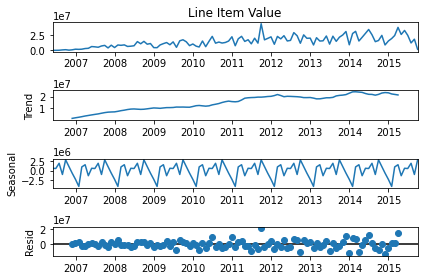

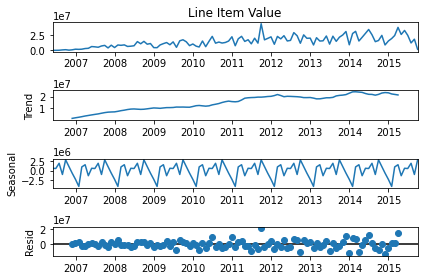

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result = seasonal_decompose(x=df_monthly['Line Item Value'],model='additive',period=12)
decompose_result.plot()

##Supply Chain Metrics Calculation

###Customer Order Cycle Time (lower values = high responsiveness)

In [ ]:
df_cycletime=df.copy()

In [ ]:
df_cycletime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

In [ ]:
#Delivered - Scheduled

df_cycletime=df_cycletime[pd.to_datetime(df['Delivered to Client Date'], errors='coerce').notnull()]
df_cycletime=df_cycletime[pd.to_datetime(df_cycletime['PO Sent to Vendor Date'], errors='coerce').notnull()]
df_cycletime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4592 entries, 9 to 6579
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            4592 non-null   int64  
 1   Project Code                  4592 non-null   object 
 2   PQ #                          4592 non-null   object 
 3   PO / SO #                     4592 non-null   object 
 4   ASN/DN #                      4592 non-null   object 
 5   Country                       4592 non-null   object 
 6   Managed By                    4592 non-null   object 
 7   Fulfill Via                   4592 non-null   object 
 8   Vendor INCO Term              4592 non-null   object 
 9   Shipment Mode                 4547 non-null   object 
 10  PQ First Sent to Client Date  4592 non-null   object 
 11  PO Sent to Vendor Date        4592 non-null   object 
 12  Scheduled Delivery Date       4592 non-null   object 
 13  Del

In [ ]:
df_cycletime['Delivered to Client Date']=pd.to_datetime(df_cycletime['Delivered to Client Date'])
df_cycletime['PO Sent to Vendor Date']=pd.to_datetime(df_cycletime['PO Sent to Vendor Date'])
df_cycletime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4592 entries, 9 to 6579
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ID                            4592 non-null   int64         
 1   Project Code                  4592 non-null   object        
 2   PQ #                          4592 non-null   object        
 3   PO / SO #                     4592 non-null   object        
 4   ASN/DN #                      4592 non-null   object        
 5   Country                       4592 non-null   object        
 6   Managed By                    4592 non-null   object        
 7   Fulfill Via                   4592 non-null   object        
 8   Vendor INCO Term              4592 non-null   object        
 9   Shipment Mode                 4547 non-null   object        
 10  PQ First Sent to Client Date  4592 non-null   object        
 11  PO Sent to Vendor Date        

<ipython-input-138-a6a43b497771>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cycletime['Delivered to Client Date']=pd.to_datetime(df_cycletime['Delivered to Client Date'])


In [ ]:
df_cycletime['Time Difference (Day)']=(df_cycletime['Delivered to Client Date']-df_cycletime['PO Sent to Vendor Date']).dt.days
df_cycletime.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),Time Difference (Day)
9,47,110-ZM-T01,Pre-PQ Process,SCMS-165,ASN-199,Zambia,PMO - US,Direct Drop,CIP,Air,...,2800,115080.00,41.10,0.34,ABBVIE (Abbott) St. P'burg USA,Yes,643,Freight Included in Commodity Cost,NaN,78
10,60,110-ZM-T01,Pre-PQ Process,SCMS-221,ASN-223,Zambia,PMO - US,Direct Drop,CIP,Air,...,2800,115080.00,41.10,0.34,ABBVIE Ludwigshafen Germany,Yes,643,Freight Included in Commodity Cost,NaN,77
13,64,107-RW-T01,Pre-PQ Process,SCMS-268,ASN-242,Rwanda,PMO - US,Direct Drop,EXW,Air,...,10000,99800.00,9.98,0.17,"Cipla, Goa, India",Yes,7416,64179.42,NaN,67
15,68,113-ZW-T01,Pre-PQ Process,SCMS-308,ASN-285,Zimbabwe,PMO - US,Direct Drop,CIP,Air,...,579,14764.50,25.50,0.42,"BMS Meymac, France",Yes,Weight Captured Separately,Freight Included in Commodity Cost,NaN,68
18,87,109-TZ-T01,Pre-PQ Process,SCMS-555,ASN-409,Tanzania,PMO - US,Direct Drop,CIP,Air,...,712,8964.08,12.59,0.06,"BMS Meymac, France",Yes,162,912.96,NaN,55


In [ ]:
brand_delay=df_cycletime[['Brand','Time Difference (Day)']]

,Time Difference (Day)
Brand,
Reveal,19.000000
Bundi,21.000000
Viramune,24.133333
Zerit,29.863636
Truvada,29.909091
Retrovir,30.541667
InstantCHEK,33.000000
Epivir,40.920000
Viread,46.478261


In [ ]:
# Top 5 best performing brands in terms of customer order cycle time
brand_delay.groupby('Brand').mean().sort_values('Time Difference (Day)',ascending=True).head(5)

,Time Difference (Day)
Brand,
Reveal,19.000000
Bundi,21.000000
Viramune,24.133333
Zerit,29.863636
Truvada,29.909091


In [ ]:
# Top 5 worst performing brand in terms of customer order cycle time
brand_delay.groupby('Brand').mean().sort_values('Time Difference (Day)',ascending=False).head(5)

,Time Difference (Day)
Brand,
DoubleCheck,215.600000
Crixivan,178.090909
Trizivir,165.200000
Ziagen,131.500000
Viracept,130.500000


###Freight Bill Accuracy

In [ ]:
df_freight=df.copy()

In [ ]:
df_freight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

In [ ]:
df_totalfreight=pd.DataFrame(df_freight.groupby('Brand').size())
df_totalfreight.reset_index(inplace=True)
df_totalfreight.rename(columns={0:'Number of Total Freight Bill'},inplace=True)
df_totalfreight.head()

,Brand,Number of Total Freight Bill
0,Aluvia,250
1,Atripla,16
2,Bioline,113
3,Bundi,2
4,Capillus,35


In [ ]:
df_freight=df_freight[pd.to_numeric(df['Freight Cost (USD)'], errors='coerce').notnull()]
df_correctfreight=pd.DataFrame(df_freight.groupby('Brand').size())
df_correctfreight.reset_index(inplace=True)
df_correctfreight.rename(columns={0:'Number of Correct Freight Bill'},inplace=True)
df_correctfreight.head()

,Brand,Number of Correct Freight Bill
0,Aluvia,179
1,Atripla,10
2,Bioline,103
3,Capillus,26
4,CareStart,1


In [ ]:
df_freightbillaccuracy=df_totalfreight.merge(df_correctfreight,how='inner',on='Brand')
df_freightbillaccuracy.head()

,Brand,Number of Total Freight Bill,Number of Correct Freight Bill
0,Aluvia,250,179
1,Atripla,16,10
2,Bioline,113,103
3,Capillus,35,26
4,CareStart,1,1


In [ ]:
df_freightbillaccuracy['Freight Bill Accuracy']=df_freightbillaccuracy['Number of Correct Freight Bill']/df_freightbillaccuracy['Number of Total Freight Bill']*100
df_freightbillaccuracy.head()

,Brand,Number of Total Freight Bill,Number of Correct Freight Bill,Freight Bill Accuracy
0,Aluvia,250,179,71.600000
1,Atripla,16,10,62.500000
2,Bioline,113,103,91.150442
3,Capillus,35,26,74.285714
4,CareStart,1,1,100.000000


In [ ]:
#Top 5 best performing brand in terms of freight bill accuracy
df_freightbillaccuracy.sort_values('Freight Bill Accuracy',ascending=False).head(5)

,Brand,Number of Total Freight Bill,Number of Correct Freight Bill,Freight Bill Accuracy
27,Pepti-LAV,1,1,100.0
4,CareStart,1,1,100.0
41,Visitect,1,1,100.0
7,Colloidal Gold,70,70,100.0
16,ImmunoComb,3,3,100.0


In [ ]:
#Top 5 worst performing brand in terms of freight bill accuracy
df_freightbillaccuracy.sort_values('Freight Bill Accuracy',ascending=True).head(5)

,Brand,Number of Total Freight Bill,Number of Correct Freight Bill,Freight Bill Accuracy
29,Retrovir,41,3,7.317073
20,Isentress,44,12,27.272727
31,Reyataz,18,5,27.777778
38,Videx EC,41,12,29.268293
34,Trizivir,18,7,38.888889
